In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [2]:
size = (100, 500)

In [3]:
coords = pd.read_csv('coord.csv')
cities = pd.read_csv('cities.csv')
events = pd.read_csv('events.csv')
events_gdf = geopandas.GeoDataFrame(events, geometry=geopandas.points_from_xy(events.longitude, events.latitude))
cities_gdf = geopandas.GeoDataFrame(cities, geometry=geopandas.points_from_xy(cities.longitude, cities.latitude))
gdf        = geopandas.GeoDataFrame(coords, geometry=geopandas.points_from_xy(coords.longitude, coords.latitude))

In [4]:
mi_polit = geopandas.read_file('mi_counties/Counties_v17a.shp')
mi_road = geopandas.read_file('michigan_highway/michigan_highway.shp')
# mi_nat = geopandas.read_file('michigan_natural/michigan_natural.shp')
mi_water = geopandas.read_file('michigan_water/michigan_water.shp')
mi_coast = geopandas.read_file('michigan_coastline/michigan_coastline.shp')

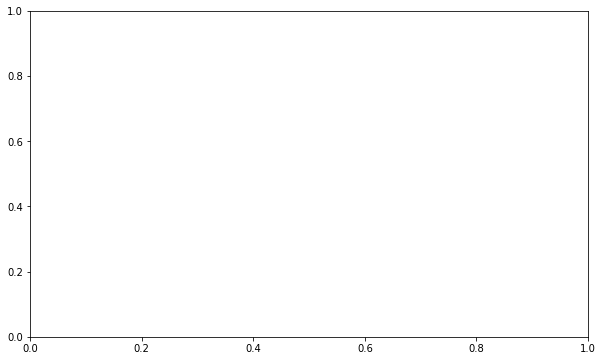

In [5]:
vmin, vmax = 0, 30000
variable = 'altitude'
fig, ax = plt.subplots(1, figsize=(10, 6))

In [6]:
polit = mi_polit.cx[-80:-88, 40:44].plot(ax=ax, color='white', edgecolor='black', figsize=size)
road = mi_road.cx[-80:-88, 40:44.25].plot(ax=polit, color='grey', edgecolor='grey', alpha=0.01, figsize=size)
# coast = mi_coast.cx[-80:-88, 40:44].plot(ax=road, color='blue', edgecolor='blue', figsize=size)
water = mi_water.cx[-80:-88, 40:44].plot(ax=road, color='blue', alpha=0.2, figsize=size)
# land = mi_land.cx[-80:-88, 40:44].plot(ax=water, color='white', alpha=0.1, edgecolor='brown', figsize=(20,25))
cities = cities_gdf.plot(ax=water, markersize=4, color='purple', figsize=size)
course = gdf.plot(ax=cities, markersize=4, column=variable, cmap='Reds', figsize=size)
events = events_gdf.plot(ax=course, markersize=6, color='yellow', figsize=size)

for x, y, label in zip(events_gdf.geometry.x, events_gdf.geometry.y, events_gdf.name):
    events.annotate(label, xy=(x, y), fontsize=6, xytext=(4, -4), textcoords="offset points")

for x, y, label in zip(cities_gdf.geometry.x, cities_gdf.geometry.y, cities_gdf.name):
    events.annotate(label, xy=(x, y), fontsize=6, xytext=(4, 4), textcoords="offset points")
    
ax.set_title('KARB IIB Flight Path', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.annotate('Made with geopandas',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('Altitude (m)', rotation=270, labelpad=15)

fig.savefig('final.png', dpi=600)
fig.show()

/Users/robertskalnins/.local/share/virtualenvs/hab-map-ZsLNSQcN/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 432x288 with 0 Axes>